In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\insurance.csv")

# EDA
   heading of data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1264,49,female,33.3,2,no,northeast,10370.91
684,33,female,18.5,1,no,southwest,4766.02
769,38,female,19.5,2,no,northwest,6933.24
327,45,male,36.5,2,yes,northwest,42760.50
676,55,female,40.8,3,no,southeast,12485.80


In [6]:
data.shape

(1338, 7)

In [7]:
#list the types of all columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#print the descriptive summaray of the data.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
#print the numberic features of the data
[features for features in data.dtypes[data.dtypes!="object"].index]

['age', 'bmi', 'children', 'charges']

In [11]:
#work same as print numberic feature
l=[]
col_list=data.columns
for i in col_list:
    if(data[i].dtype!="object"):
        l.append(i)
l

['age', 'bmi', 'children', 'charges']

In [12]:
#get numberic feature
num_features=data.dtypes[data.dtypes!="object"].index

In [13]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [14]:
data[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Distribution of categorical features

In [15]:
cat_features=data.dtypes[data.dtypes=="object"].index
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
#print summary of catogorical features
data[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Check Unique Labels in categorical features

In [17]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [18]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [20]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data Cleaning

# Drop Duplicate
    #if there is any duplicate rows exist or not [if exist then remove it from dataframe]


In [23]:
#check shape before drop duplicates
data.shape

(1338, 7)

In [24]:
#drop duplicates
#two ways 1 df=df.drop_duplicates(), 2 df.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True)

In [25]:
#recheck the shape after dropping duplicates
data.shape #here you can see 1 duplicate row has been droppped

(1337, 7)

# check null values in dataset


In [26]:
#both methods are work same
#data.isna().sum()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization
    Histogram is most commanly used graph to display numberic data

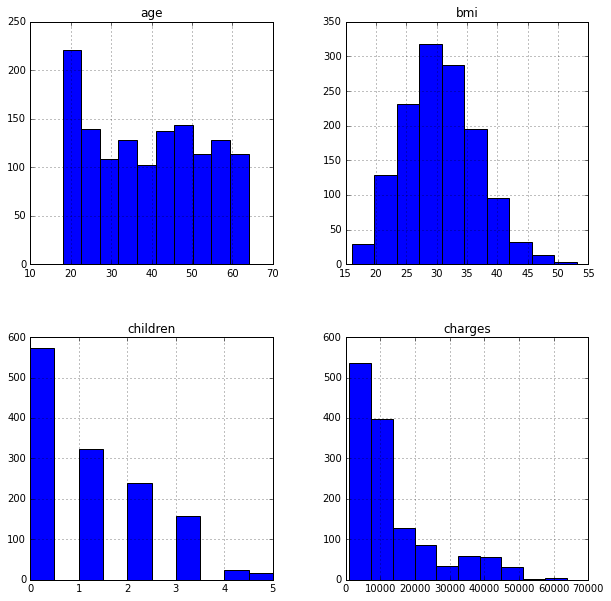

In [27]:
#histogram of each feature
style.use("classic")
data.hist(bins=10,figsize=(10,10),)
plt.show()

# Scatter plot 

Scatterplot is a type of graph which plots values of two variables along two axes  like age and height  Scatterplots usefull for many reasons 
like corelation , matrices  it allows you to understand  a realtionship n between  two varibles

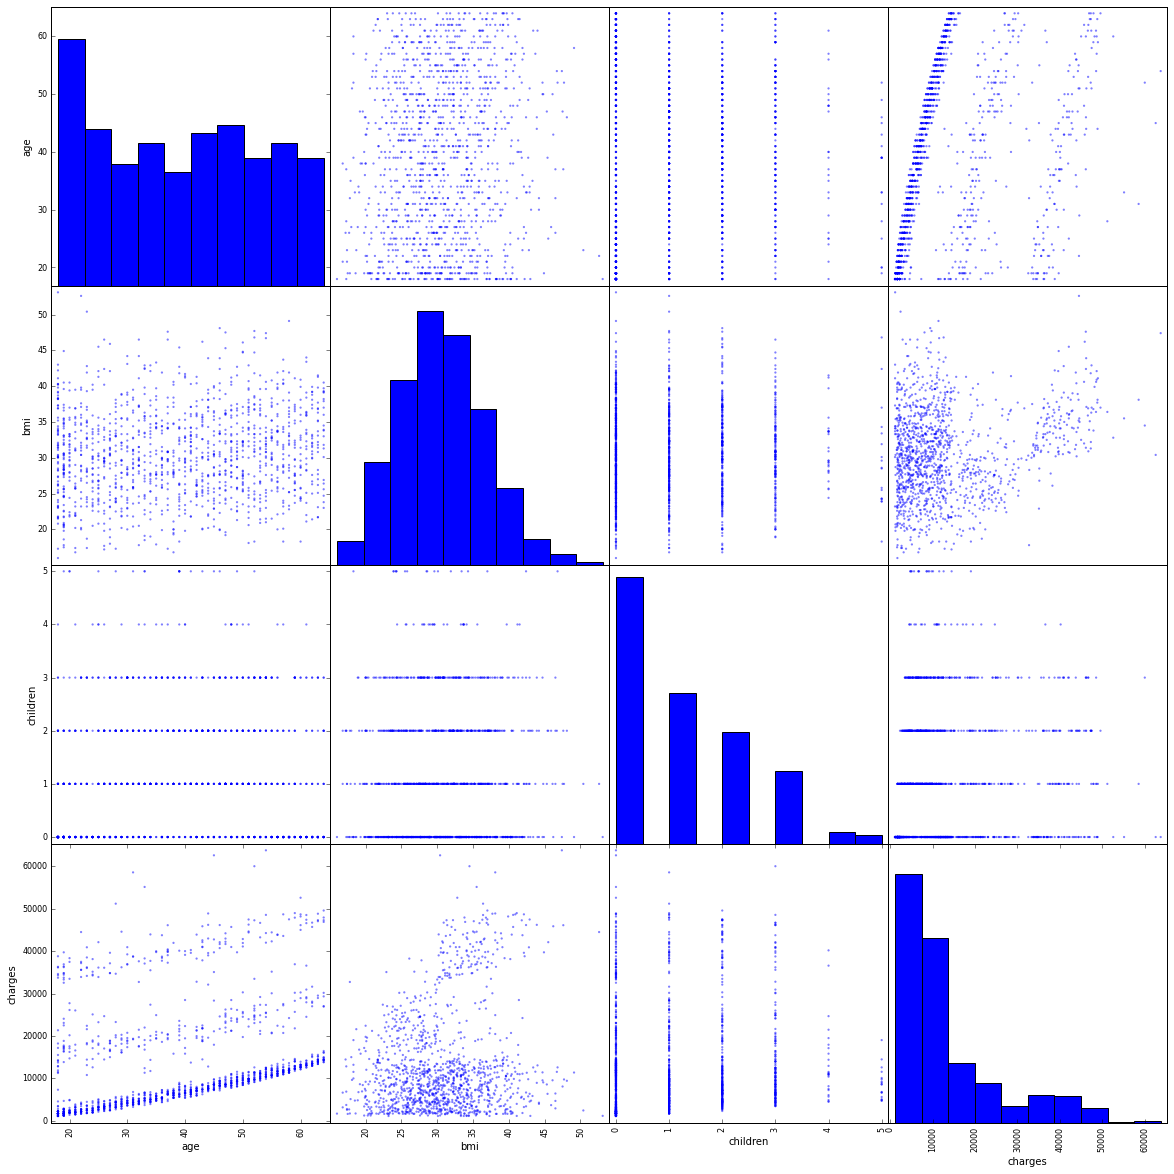

In [28]:
#scatter plot matrics
from pandas.plotting import scatter_matrix
#scatter matric method takes entire dataset as argument along with figsize
scatter_matrix(data,figsize=(20,20))
plt.show()

# Feature Engineering:

### Converting Categorical Variable to Numerical variable 

Apply get_dummies() Method:

This is one of approach and also each one to encode  Categorical Data  pandas.get_dummies() method  method  takes categorical  feature as an argument Then it Creates Dummy Variable  for every label in feature, Such that  each dummy varable  holds data as 1 or 0  Indicate presence of particular label  and 0  indicates  the absence of particular level 




for Example :  if a feature contains Male and Female  After Applying pandas.get_dummies to that feature  to that feature ,Dummy variable  for both male and  Female labels are created i.e Dummy variables  are created  for every label  in the feature  so that Dummy variabe holds 1 in presence of that label  and as 0  in absence of that label

In [29]:
#create seperate male and female catergory out of sex feature
dummies=pd.get_dummies(data.sex)
dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
#concat seperated male and female into dataset
merge=pd.concat([data,dummies],axis=1)
merge.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.9,0,yes,southwest,16884.92,1,0
1,18,male,33.8,1,no,southeast,1725.55,0,1
2,28,male,33.0,3,no,southeast,4449.46,0,1
3,33,male,22.7,0,no,northwest,21984.47,0,1
4,32,male,28.9,0,no,northwest,3866.86,0,1


In [31]:
#dropping sex and female columns
df1=merge.drop(["sex","female"],axis=1)

In [32]:
df1.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.9,0,yes,southwest,16884.92,0
1,18,33.8,1,no,southeast,1725.55,1
2,28,33.0,3,no,southeast,4449.46,1
3,33,22.7,0,no,northwest,21984.47,1
4,32,28.9,0,no,northwest,3866.86,1


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   bmi       1337 non-null   float64
 2   children  1337 non-null   int64  
 3   smoker    1337 non-null   object 
 4   region    1337 non-null   object 
 5   charges   1337 non-null   float64
 6   male      1337 non-null   uint8  
dtypes: float64(2), int64(2), object(2), uint8(1)
memory usage: 74.4+ KB


In [34]:
dummy2=pd.get_dummies(df1["smoker"])
dummy2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
merge2=pd.concat([df1,dummy2],axis=1)
merge2.head()

,age,bmi,children,smoker,region,charges,male,no,yes
0,19,27.9,0,yes,southwest,16884.92,0,0,1
1,18,33.8,1,no,southeast,1725.55,1,1,0
2,28,33.0,3,no,southeast,4449.46,1,1,0
3,33,22.7,0,no,northwest,21984.47,1,1,0
4,32,28.9,0,no,northwest,3866.86,1,1,0


In [36]:
df2=merge2.drop(["smoker","no"],axis=1)
df2.head()

,age,bmi,children,region,charges,male,yes
0,19,27.9,0,southwest,16884.92,0,1
1,18,33.8,1,southeast,1725.55,1,0
2,28,33.0,3,southeast,4449.46,1,0
3,33,22.7,0,northwest,21984.47,1,0
4,32,28.9,0,northwest,3866.86,1,0


In [37]:
dummy3=pd.get_dummies(df2["region"])
dummy3.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [38]:
merge3=pd.concat([df2,dummy3],axis=1)
merge3.head()

,age,bmi,children,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,southwest,16884.92,0,1,0,0,0,1
1,18,33.8,1,southeast,1725.55,1,0,0,0,1,0
2,28,33.0,3,southeast,4449.46,1,0,0,0,1,0
3,33,22.7,0,northwest,21984.47,1,0,0,1,0,0
4,32,28.9,0,northwest,3866.86,1,0,0,1,0,0


In [39]:
merge3.northeast.value_counts()

0    1013
1     324
Name: northeast, dtype: int64

In [40]:
df3=merge3.drop(["region"],axis=1)

In [41]:
df3.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0


# Data is ready to train the model

# Split the data into x and y

In [42]:
target_name="charges"
#seperate target varible/ dependent variable out of dataframe
y=df3[target_name]
#seperate input varible/ independent variable out of dataframe
x=df3.drop(target_name,axis=1)

In [43]:
x.shape

(1337, 9)

In [44]:
y.shape

(1337,)

# Train-Test,Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [47]:
x_train.shape,y_train.shape

((1069, 9), (1069,))

In [48]:
x_test.shape,y_test.shape

((268, 9), (268,))

# Building Model

In [49]:
#import linear regression model
from sklearn.linear_model import LinearRegression

In [50]:
#creating an object of model
lr=LinearRegression()
#training the model
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
#Testing the model or predicting the model
y_pred=lr.predict(x_test)

# Evaluation Matrix

In [52]:
#Train score
train_score=lr.score(x_train,y_train)
print("Train Score : ",train_score)

Train Score :  0.7529469407973212


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2_Score : ",score)

R2_Score :  0.7405436314738477


In [54]:
from sklearn import metrics

In [55]:
print("Mean Absolute  Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute  Error 4393.838937013874
Mean Squared Error 41911806.980784714
Root Mean Square Error 66.28603877902098


In [57]:
df4=pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Variance":y_test-y_pred})
df4

,Actual,Predicted,Variance
13,11090.72,14428.920783,-3338.200783
1052,9288.03,11290.895725,-2002.865725
172,1694.80,-1768.263286,3463.063286
395,7526.71,5781.158123,1745.551877
934,4673.39,8475.161731,-3801.771731
...,...,...,...
1028,9850.43,11516.830232,-1666.400232
97,10226.28,13629.890248,-3403.610248
220,5012.47,7716.083569,-2703.613569
41,4949.76,8056.829743,-3107.069743


In [63]:
from sklearn.metrics import explained_variance_score,confusion_matrix

In [64]:
explained_variance_score(y_test,y_pred)

0.7438684123159459